In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv("Data_set.csv")

In [3]:
print(len(data))

6362620


In [4]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data = data.drop(['type','nameOrig', 'nameDest'], axis=1)

In [8]:
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']


In [9]:
print(data.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
data.shape

(6362620, 8)

In [11]:
fraud_count = data[data['isFraud'] == 1].shape[0]   # Replace '1' with the value indicating fraud
not_fraud_count = data[data['isFraud'] == 0].shape[0]  # Replace '0' with the value indicating not fraud

print(f"Total Fraud Data: {fraud_count}")
print(f"Total Not-Fraud Data: {not_fraud_count}")

Total Fraud Data: 8213
Total Not-Fraud Data: 6354407


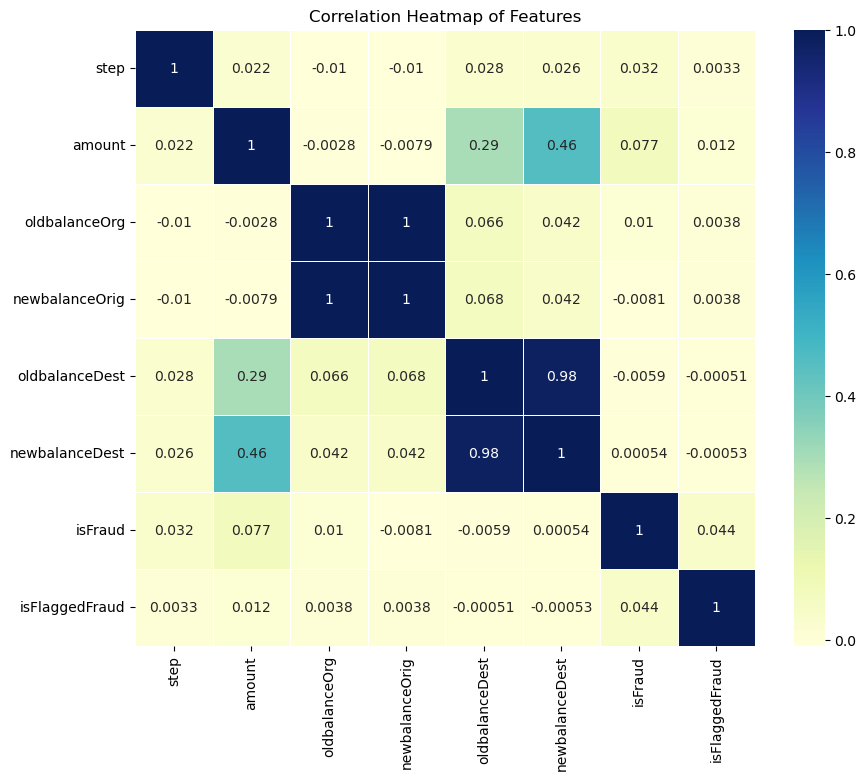

In [12]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [15]:
from collections import Counter

print("Class distribution before SMOTE:")
for label, count in Counter(y_train).items():
    print(f"Class {label}: {count} data points")

print("\nClass distribution after SMOTE:")
for label, count in Counter(y_train_smote).items():
    print(f"Class {label}: {count} data points")


Class distribution before SMOTE:
Class 0: 5083503 data points
Class 1: 6593 data points

Class distribution after SMOTE:
Class 0: 5083503 data points
Class 1: 5083503 data points


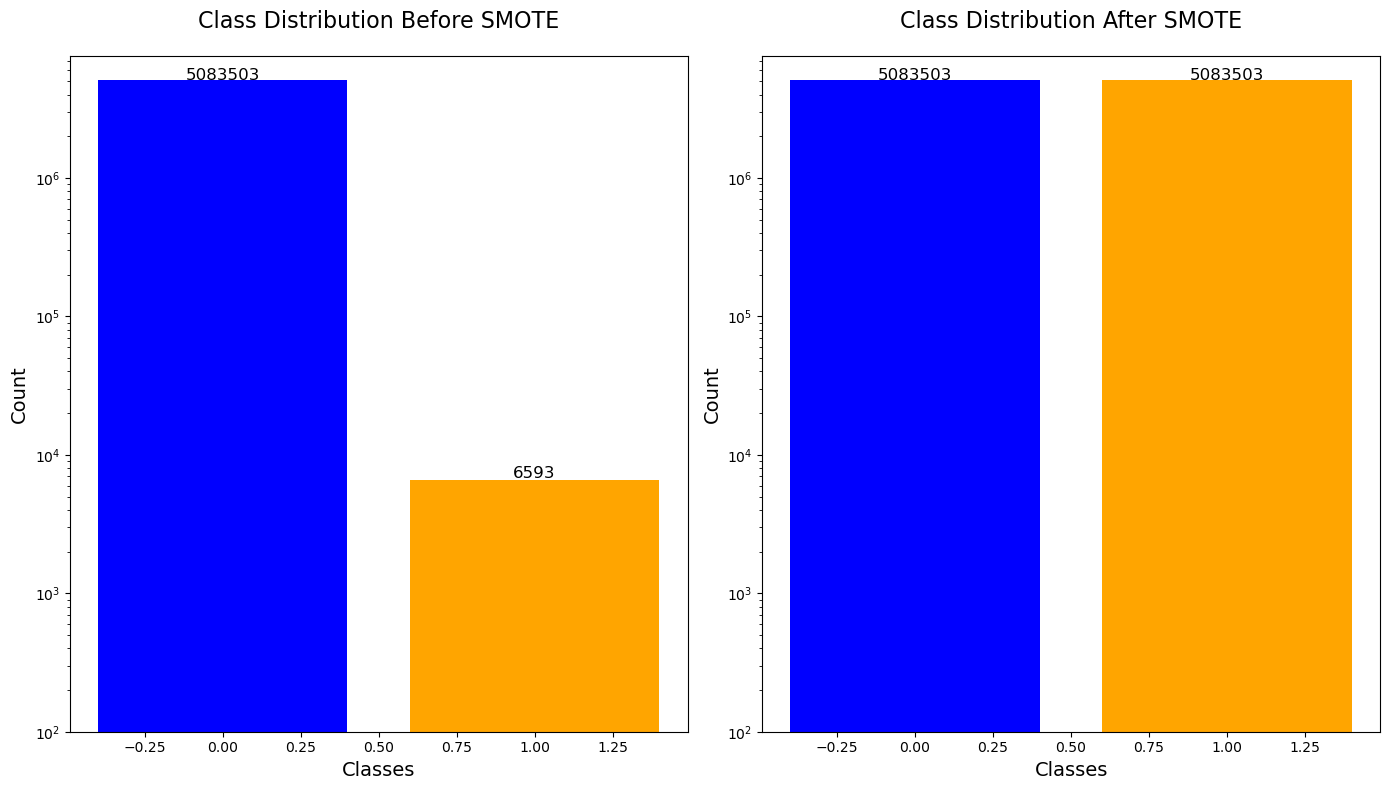

In [16]:
from collections import Counter

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange'])
plt.title('Class Distribution Before SMOTE', fontsize=16, pad=20)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yscale('log')
plt.ylim(100, max(Counter(y_train).values()) * 1.5)  

for i, count in enumerate(Counter(y_train).values()):
    plt.text(i, count + 200, str(count), ha='center', fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values(), color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE', fontsize=16, pad=20)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yscale('log')
plt.ylim(100, max(Counter(y_train_smote).values()) * 1.5)

for i, count in enumerate(Counter(y_train_smote).values()):
    plt.text(i, count + 200, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
not_fraud_reduction_factor = 0.2
not_fraud_count = sum(y_train == 0) 
fraud_count = sum(y_train == 1)  
new_not_fraud_count = int(not_fraud_count * not_fraud_reduction_factor)
sampling_strategy = fraud_count / new_not_fraud_count
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
resampled_counts = pd.Series(y_train_smote).value_counts()
print("Counts after SMOTE with 80% Not-Fraud Reduction:")
print(f"Not-Fraud Data: {resampled_counts[0]}") 
print(f"Fraud Data: {resampled_counts[1]}") 

Counts after SMOTE with 80% Not-Fraud Reduction:
Not-Fraud Data: 5083503
Fraud Data: 32965


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [19]:
LR = LogisticRegression(max_iter=1000, random_state=42)
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier( n_estimators=50,max_depth=15,n_jobs=-1,random_state=42)      
KN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
XG = XGBClassifier(eval_metric='logloss', random_state=42)


models = [LR, KN, DC, RF, XG]

In [20]:


def plot_confusion_matrix(y_test, prediction, model_name=None):  
    cm_ = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_, cmap='YlGnBu', linecolor='white', linewidths=1, annot=True, fmt='d')
    if model_name:
        plt.title(f'Confusion Matrix for {model_name}')
    else:
        plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [21]:
def trainer(model, X_train_smote, y_train_smote, X_test, y_test):
    model.fit(X_train_smote, y_train_smote)  
    prediction = model.predict(X_test)     
    print(f'\nFor {model.__class__.__name__}, Accuracy score is {accuracy_score(y_test, prediction):.4f}\n')
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(y_test, prediction, model.__class__.__name__)


For LogisticRegression, Accuracy score is 0.9991

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.66      0.58      0.62      1620

    accuracy                           1.00   1272524
   macro avg       0.83      0.79      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



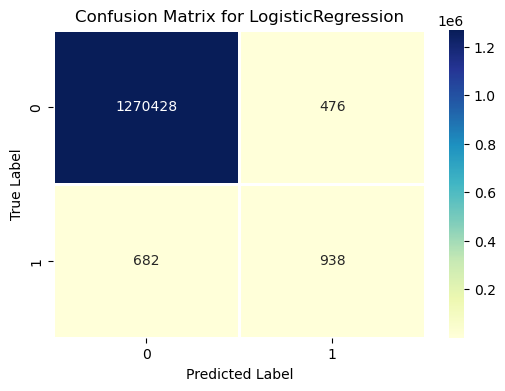


For KNeighborsClassifier, Accuracy score is 0.9990

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.56      0.79      0.66      1620

    accuracy                           1.00   1272524
   macro avg       0.78      0.90      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524



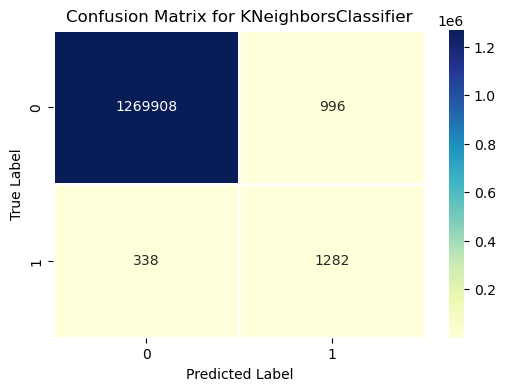


For DecisionTreeClassifier, Accuracy score is 0.9995

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.77      0.91      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.95      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



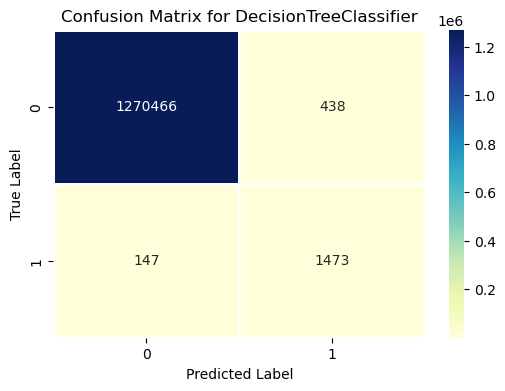


For RandomForestClassifier, Accuracy score is 0.9996

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.77      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.89      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



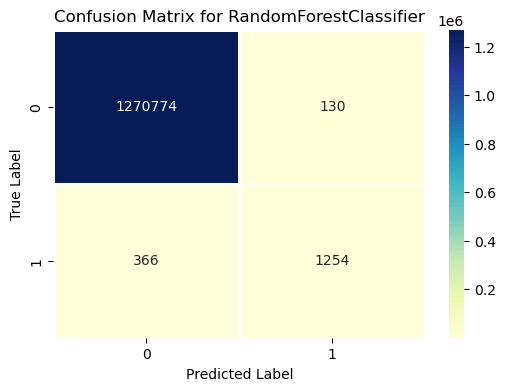


For XGBClassifier, Accuracy score is 0.9996

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.80      0.89      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.90      0.94      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



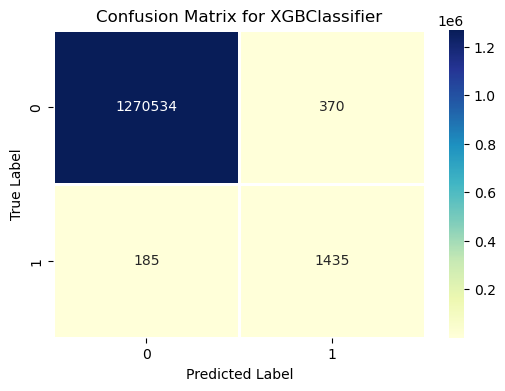

In [22]:
for model in models:
    trainer(model, X_train_smote, y_train_smote, X_test, y_test)

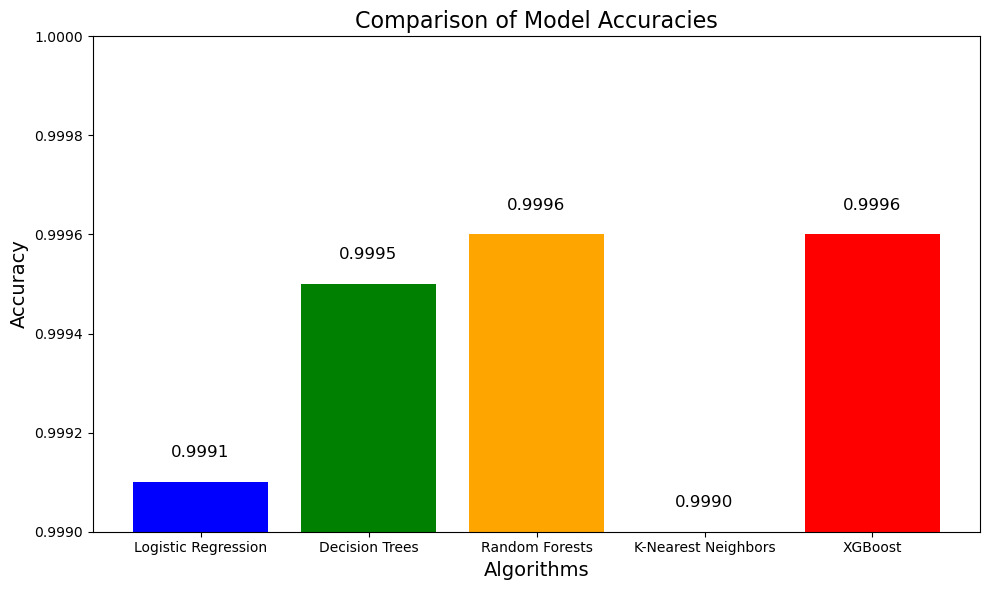

In [23]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 
          'K-Nearest Neighbors', 'XGBoost']
accuracies = [0.9991, 0.9995, 0.9996, 0.999, 0.9996]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])

plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.999, 1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.00005, f'{acc:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

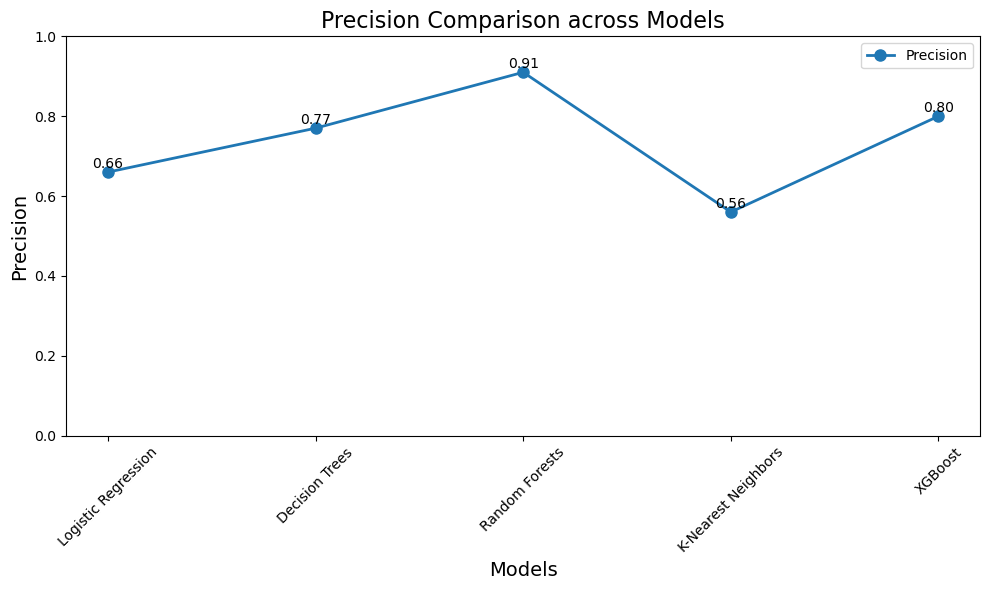

In [24]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 
          'K-Nearest Neighbors', 'XGBoost']

precision = [0.66, 0.77, 0.91, 0.56, 0.8]

x = np.arange(len(models))

plt.figure(figsize=(10, 6))

plt.plot(x, precision, marker='o', label='Precision', color='#1f77b4', linestyle='-', linewidth=2, markersize=8)

plt.title('Precision Comparison across Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1)

for i in range(len(models)):
    plt.text(i, precision[i] + 0.01, f'{precision[i]:.2f}', ha='center', fontsize=10)

plt.legend()

plt.tight_layout()

plt.show()

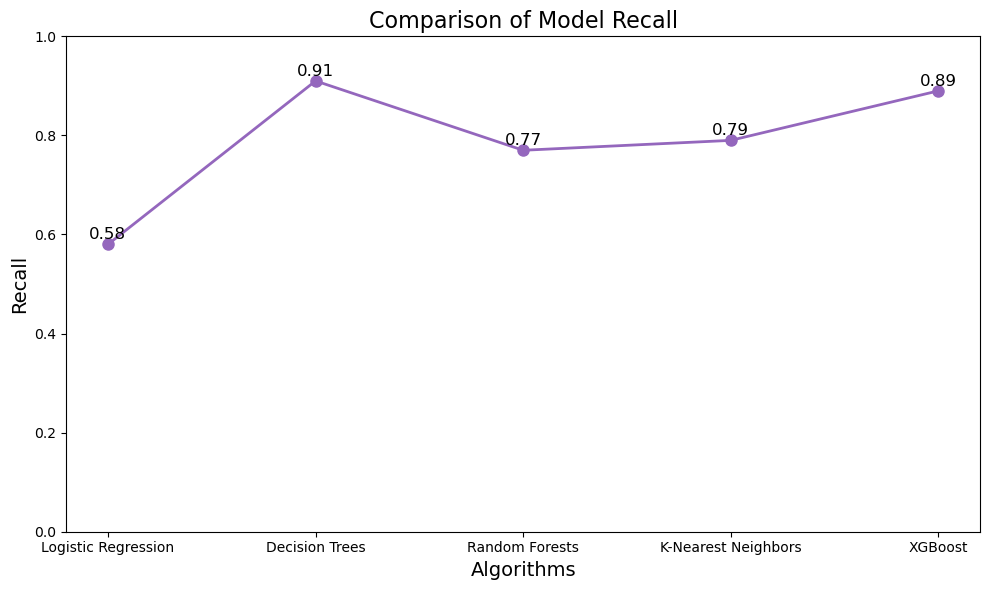

In [25]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 
          'K-Nearest Neighbors', 'XGBoost']
recall = [0.58, 0.91, 0.77, 0.79, 0.89]

plt.figure(figsize=(10, 6))
plt.plot(models, recall, marker='o', color='#9467bd', linestyle='-', markersize=8, linewidth=2)

plt.title('Comparison of Model Recall', fontsize=16)
plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.ylim(0, 1)

# Adding the recall values as text on the plot
for i, acc in enumerate(recall):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

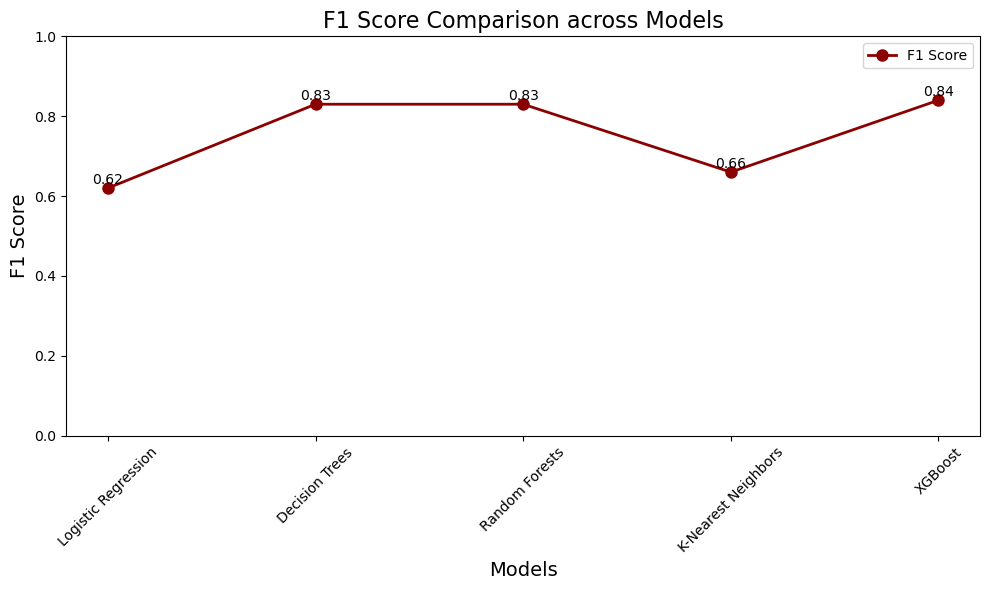

In [26]:
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 
          'K-Nearest Neighbors', 'XGBoost']

f1_score = [0.62, 0.83, 0.83, 0.66, 0.84]

x = np.arange(len(models))

plt.figure(figsize=(10, 6))

plt.plot(x, f1_score, marker='o', label='F1 Score', color='#8B0000', linestyle='-', linewidth=2, markersize=8)

plt.title('F1 Score Comparison across Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1)

for i in range(len(models)):
    plt.text(i, f1_score[i] + 0.01, f'{f1_score[i]:.2f}', ha='center', fontsize=10)

plt.legend()

plt.tight_layout()

plt.show()

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

In [28]:
def plot_comparative_roc(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    
    for model in models:
        plot_roc_curve(model, X_test, y_test)
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparative ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

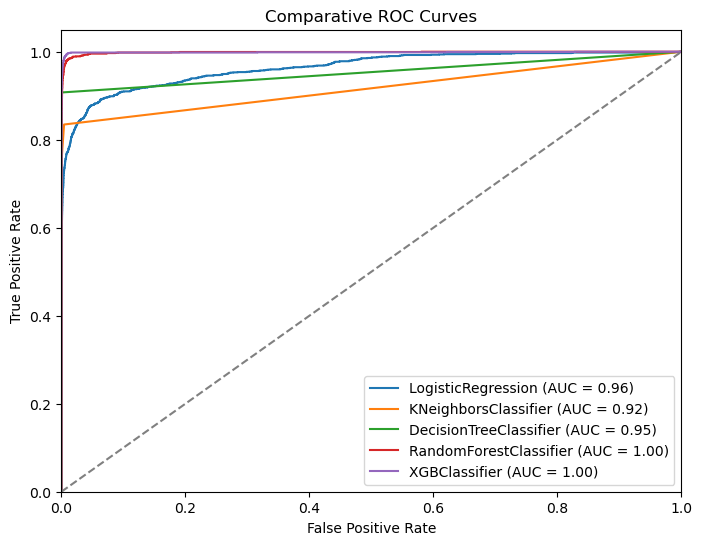

In [34]:
models = [LR, KN, DC, RF, XG]
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_smote.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_smote.columns)

for model in models:
    model.fit(X_train_scaled_df, y_train_smote)

plot_comparative_roc(models, X_test_scaled_df, y_test)

In [44]:
def fraud_predictor(step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest):
    try:
        input_data = [step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest]
        if len(input_data) != 6:
            raise ValueError("Please provide exactly 6 numerical inputs.")
        scaled_data = scaler.transform([input_data])
        prediction = XG.predict(scaled_data)
        result = "\033[1;92mTHE TRANSACTION IS NON-FRAUDULENT.\033[0m" if prediction[0] == 0 else "\033[1;91mTHE TRANSACTION IS FRAUDULENT.\033[0m"
        print(result)
        return prediction[0]
    except Exception as e:
        print(f"Error: {e}")

try:
    step = float(input("Enter the time step (step): "))
    amount = float(input("Enter the transaction amount: "))
    oldbalanceOrg = float(input("Enter the sender's balance before the transaction (oldbalanceOrg): "))
    newbalanceOrg = float(input("Enter the sender's balance after the transaction (newbalanceOrg): "))
    oldbalanceDest = float(input("Enter the receiver's balance before the transaction (oldbalanceDest): "))
    newbalanceDest = float(input("Enter the receiver's balance after the transaction (newbalanceDest): "))
    fraud_predictor(step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest)
except ValueError:
    print("Invalid input. Please enter numerical values only.")
except Exception as e:
    print(f"Unexpected error: {e}")


Enter the time step (step):  1
Enter the transaction amount:  1000
Enter the sender's balance before the transaction (oldbalanceOrg):  2000
Enter the sender's balance after the transaction (newbalanceOrg):  2000
Enter the receiver's balance before the transaction (oldbalanceDest):  300
Enter the receiver's balance after the transaction (newbalanceDest):  1300


THE TRANSACTION IS NON-FRAUDULENT.


V:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
def fraud_predictor(step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest):
    try:
        input_data = [step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest]
        if len(input_data) != 6:
            raise ValueError("Please provide exactly 6 numerical inputs.")
        scaled_data = scaler.transform([input_data])
        prediction = RF.predict(scaled_data)
        result = "\033[1;92mTHE TRANSACTION IS NON-FRAUDULENT.\033[0m" if prediction[0] == 0 else "\033[1;91mTHE TRANSACTION IS FRAUDULENT.\033[0m"
        print(result)
        return prediction[0]
    except Exception as e:
        print(f"Error: {e}")

try:
    step = float(input("Enter the time step (step): "))
    amount = float(input("Enter the transaction amount: "))
    oldbalanceOrg = float(input("Enter the sender's balance before the transaction (oldbalanceOrg): "))
    newbalanceOrg = float(input("Enter the sender's balance after the transaction (newbalanceOrg): "))
    oldbalanceDest = float(input("Enter the receiver's balance before the transaction (oldbalanceDest): "))
    newbalanceDest = float(input("Enter the receiver's balance after the transaction (newbalanceDest): "))
    fraud_predictor(step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest)
except ValueError:
    print("Invalid input. Please enter numerical values only.")
except Exception as e:
    print(f"Unexpected error: {e}")


Enter the time step (step):  1
Enter the transaction amount:  5337.77
Enter the sender's balance before the transaction (oldbalanceOrg):  41720.00
Enter the sender's balance after the transaction (newbalanceOrg):  36382.23
Enter the receiver's balance before the transaction (oldbalanceDest):  41898.0
Enter the receiver's balance after the transaction (newbalanceDest):  40348.79	


THE TRANSACTION IS NON-FRAUDULENT.


V:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
V:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
